<a href="https://colab.research.google.com/github/Saba-a11/Machine-Learning/blob/master/CustomerPersonalityAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
ls

marketing_campaign.csv  sample_data/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [161]:
pd.options.display.max_columns = None
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,"58,138.00",0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,"46,344.00",1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,"71,613.00",0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,"58,293.00",1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Attributes

**People**

- **ID:** Customer's unique identifier
- **Year_Birth:** Customer's birth year
- **Education:** Customer's education level
- **Marital_Status:** Customer's marital status
- **Income:** Customer's yearly household income
- **Kidhome:** Number of children in customer's household
- **Teenhome:**Number of teenagers in customer's household
- **Dt_Customer:** Date of customer's enrollment with the company
- **Recency:** Number of days since customer's last purchase
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- **MntWines:** Amount spent on wine in last 2 years
- **MntFruits:** Amount spent on fruits in last 2 years
- **MntMeatProducts:** Amount spent on meat in last 2 years
- **MntFishProducts:** Amount spent on fish in last 2 years
- **MntSweetProducts:** Amount spent on sweets in last 2 years
- **MntGoldProds:** Amount spent on gold in last 2 years

**Promotion**

- **NumDealsPurchases:** Number of purchases made with a discount
- **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- **NumWebPurchases:** Number of purchases made through the company’s website
- **NumCatalogPurchases:** Number of purchases made using a catalogue
- **NumStorePurchases:** Number of purchases made directly in stores
- **NumWebVisitsMonth:** Number of visits to company’s website in the last month

In [162]:
df.shape

(2240, 29)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [164]:
pd.options.display.max_columns = None
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,"2,240.00","2,240.00","2,216.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00"
mean,"5,592.16","1,968.81","52,247.25",0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,"3,246.66",11.98,"25,173.08",0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,"1,893.00","1,730.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,"2,828.25","1,959.00","35,303.00",0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,"5,458.50","1,970.00","51,381.50",0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,"8,427.75","1,977.00","68,522.00",1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,"11,191.00","1,996.00","666,666.00",2.00,2.00,99.00,"1,493.00",199.00,"1,725.00",259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


In [165]:
df.describe(include=['O'])

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [166]:
# For clarity

df = df.rename(
    columns={
        "MntWines": "Wines",
        "MntFruits": "Fruits",
        "MntMeatProducts": "Meat",
        "MntFishProducts": "Fish",
        "MntSweetProducts": "Sweets",
        "MntGoldProds": "Gold",
        'AcceptedCmp1': 'Cmp1',
        'AcceptedCmp2': 'Cmp2',
        'AcceptedCmp3': 'Cmp3',
        'AcceptedCmp4': 'Cmp4',
        'AcceptedCmp5': 'Cmp5',

    }
)

In [167]:
columns_of_interest = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain',
                       'Wines', 'Fruits', 'Meat', 'Fish',
                       'Sweets', 'Gold', 'NumDealsPurchases',
                       'Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5', 'Response',
                       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
correlation_matrix = df[columns_of_interest].corr()
correlation_matrix

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,Cmp1,Cmp2,Cmp3,Cmp4,Cmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Year_Birth,1.00,-0.16,0.23,-0.35,-0.02,-0.03,-0.16,-0.02,-0.03,-0.04,-0.02,-0.06,-0.06,-0.01,-0.01,0.06,-0.06,0.01,0.02,-0.15,-0.12,-0.13,0.12
Income,-0.16,1.00,-0.43,0.02,-0.00,-0.03,0.58,0.43,0.58,0.44,0.44,0.33,-0.08,0.28,0.09,-0.02,0.18,0.34,0.13,0.39,0.59,0.53,-0.55
Kidhome,0.23,-0.43,1.00,-0.04,0.01,0.04,-0.50,-0.37,-0.44,-0.39,-0.37,-0.35,0.22,-0.17,-0.08,0.01,-0.16,-0.21,-0.08,-0.36,-0.50,-0.50,0.45
Teenhome,-0.35,0.02,-0.04,1.00,0.02,0.00,0.00,-0.18,-0.26,-0.20,-0.16,-0.02,0.39,-0.14,-0.02,-0.04,0.04,-0.19,-0.15,0.16,-0.11,0.05,0.13
Recency,-0.02,-0.00,0.01,0.02,1.00,0.01,0.02,-0.00,0.02,0.00,0.02,0.02,-0.00,-0.02,-0.00,-0.03,0.02,0.00,-0.20,-0.01,0.03,0.00,-0.02
Complain,-0.03,-0.03,0.04,0.00,0.01,1.00,-0.04,-0.01,-0.02,-0.02,-0.02,-0.03,0.00,-0.03,-0.01,0.01,-0.03,-0.01,-0.00,-0.02,-0.02,-0.02,0.02
Wines,-0.16,0.58,-0.50,0.00,0.02,-0.04,1.00,0.39,0.56,0.40,0.39,0.39,0.01,0.35,0.21,0.06,0.37,0.47,0.25,0.54,0.64,0.64,-0.32
Fruits,-0.02,0.43,-0.37,-0.18,-0.00,-0.01,0.39,1.00,0.54,0.59,0.57,0.39,-0.13,0.19,-0.01,0.01,0.01,0.22,0.13,0.30,0.49,0.46,-0.42
Meat,-0.03,0.58,-0.44,-0.26,0.02,-0.02,0.56,0.54,1.00,0.57,0.52,0.35,-0.12,0.31,0.04,0.02,0.10,0.37,0.24,0.29,0.72,0.48,-0.54
Fish,-0.04,0.44,-0.39,-0.20,0.00,-0.02,0.40,0.59,0.57,1.00,0.58,0.42,-0.14,0.26,0.00,0.00,0.02,0.20,0.11,0.29,0.53,0.46,-0.45


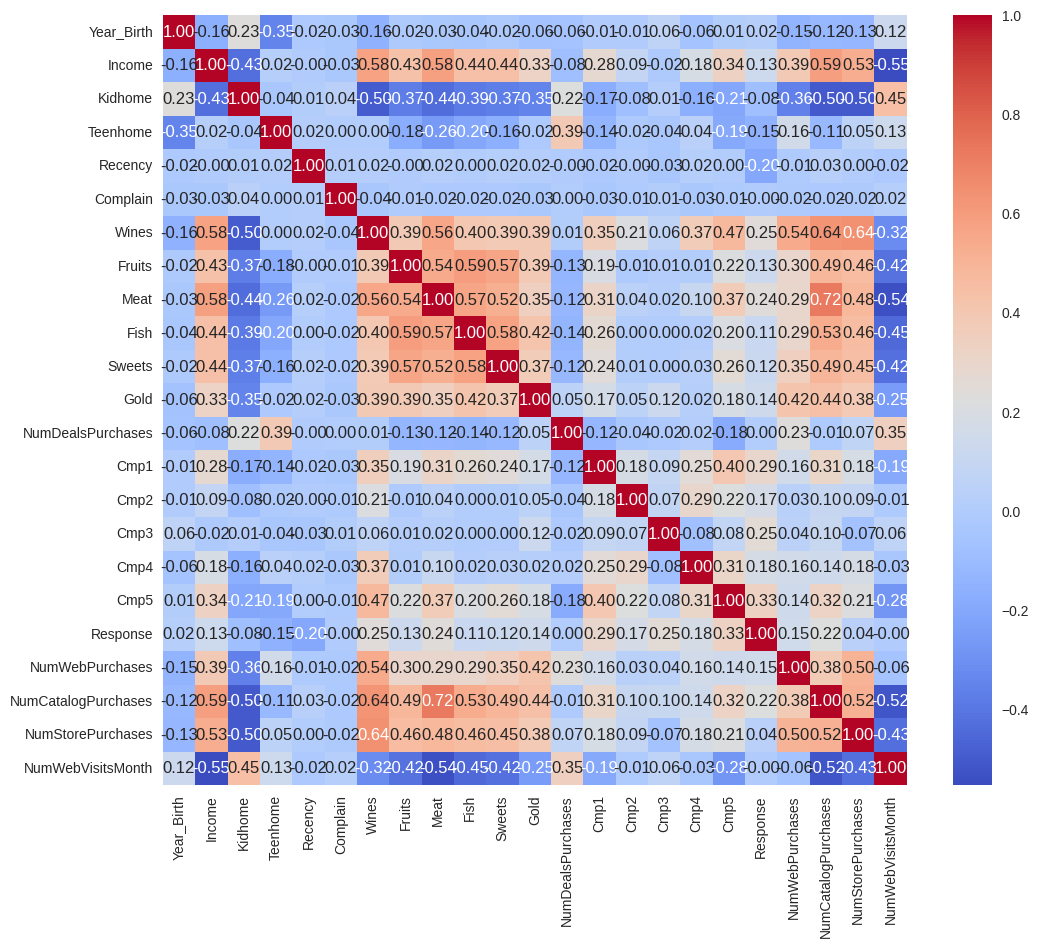

In [168]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [169]:
columns_of_interest = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain',
                       'Wines', 'Fruits', 'Meat', 'Fish',
                       'Sweets', 'Gold']
correlation_matrix = df[columns_of_interest].corr()
correlation_matrix

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,Wines,Fruits,Meat,Fish,Sweets,Gold
Year_Birth,1.00,-0.16,0.23,-0.35,-0.02,-0.03,-0.16,-0.02,-0.03,-0.04,-0.02,-0.06
Income,-0.16,1.00,-0.43,0.02,-0.00,-0.03,0.58,0.43,0.58,0.44,0.44,0.33
Kidhome,0.23,-0.43,1.00,-0.04,0.01,0.04,-0.50,-0.37,-0.44,-0.39,-0.37,-0.35
Teenhome,-0.35,0.02,-0.04,1.00,0.02,0.00,0.00,-0.18,-0.26,-0.20,-0.16,-0.02
Recency,-0.02,-0.00,0.01,0.02,1.00,0.01,0.02,-0.00,0.02,0.00,0.02,0.02
Complain,-0.03,-0.03,0.04,0.00,0.01,1.00,-0.04,-0.01,-0.02,-0.02,-0.02,-0.03
Wines,-0.16,0.58,-0.50,0.00,0.02,-0.04,1.00,0.39,0.56,0.40,0.39,0.39
Fruits,-0.02,0.43,-0.37,-0.18,-0.00,-0.01,0.39,1.00,0.54,0.59,0.57,0.39
Meat,-0.03,0.58,-0.44,-0.26,0.02,-0.02,0.56,0.54,1.00,0.57,0.52,0.35
Fish,-0.04,0.44,-0.39,-0.20,0.00,-0.02,0.40,0.59,0.57,1.00,0.58,0.42


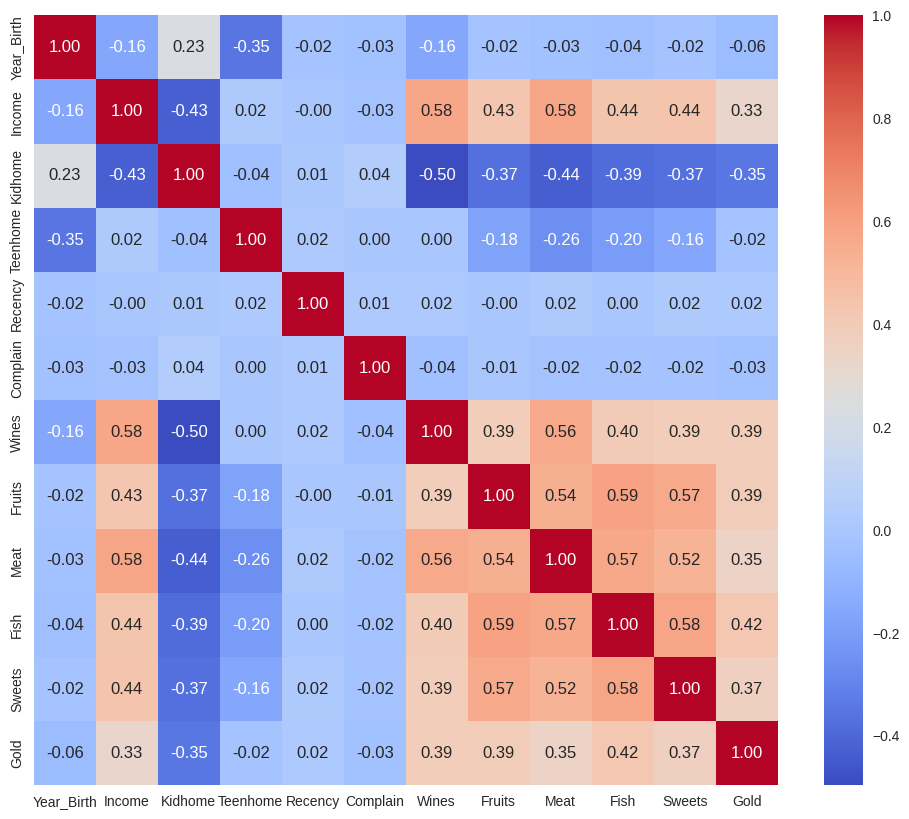

In [170]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## Data Cleaning & Data Engineering

- There are missing values in `Income`.
- `Dt_Customer` that indicates the date a customer joined the database is not parsed as DateTime.
- Creating a feature `Customer_For` of the number of days the customers started to shop in the store relative to the last recorded date.
- Extract the `Age` of a customer by the `Year_Birth` indicating the birth year of the respective person.
- Create another feature `Living_With` out of `Marital_Status` to extract the living situation of couples.
- Create a feature `Children` to indicate total children in a household that is, kids and teenagers.
- To get further clarity of household, Creating feature indicating `Family_Size`
Create a feature `Is_Parent` to indicate parenthood status
- Create three categories in the `Education` by simplifying its value counts.
- Dropping some of the redundant feature.
- There are some categorical features in our data frame; as there are some features in `dtype: object`. So we will need to encode them into numeric forms later.

In [171]:
# Count the number of null values

df['Income'].isnull().sum()

24

In [172]:
# Strategy 1: To remove all null values

# data = data.dropna()

In [173]:
# Strategy 2: Fill null values with the mean for Income column

mean_value = df['Income'].mean()
df['Income'].fillna(mean_value, inplace=True)

In [174]:
# Count the number of null values

df['Income'].isnull().sum()

0

In [175]:
# Change data type from object to datetime

df['Dt_Customer'] = df['Dt_Customer'].apply(
    pd.to_datetime, dayfirst=True, errors="coerce"
)

In [176]:
# Find the data type

df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [177]:
# Dates of the newest and oldest recorded customer

df['Dt_Customer'].agg(['min', 'max'])

min   2012-07-30
max   2014-06-29
Name: Dt_Customer, dtype: datetime64[ns]

In [178]:
def extract_day(date):
    # Extract the date part from the datetime object
    day = date.days
    return day

In [179]:
# Calculate the difference between the maximum date and each date in 'Dt_Customer'
df['Customer_For'] = df['Dt_Customer'].max() - df['Dt_Customer']

# Extract the number of days from the timedelta object
df['Customer_For'] = df['Customer_For'].apply(extract_day)

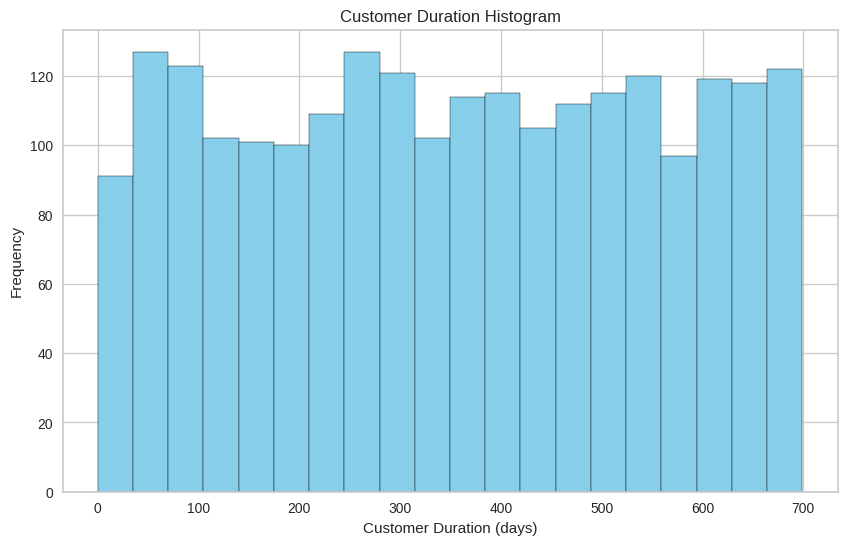

In [180]:
# Plotting the 'customer_for' column

plt.figure(figsize=(10, 6))
plt.hist(df['Customer_For'], bins=20, color='skyblue', edgecolor='black')
plt.title('Customer Duration Histogram')
plt.xlabel('Customer Duration (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [181]:
# Create new column Age

df["Age"] = 2024 - df["Year_Birth"]

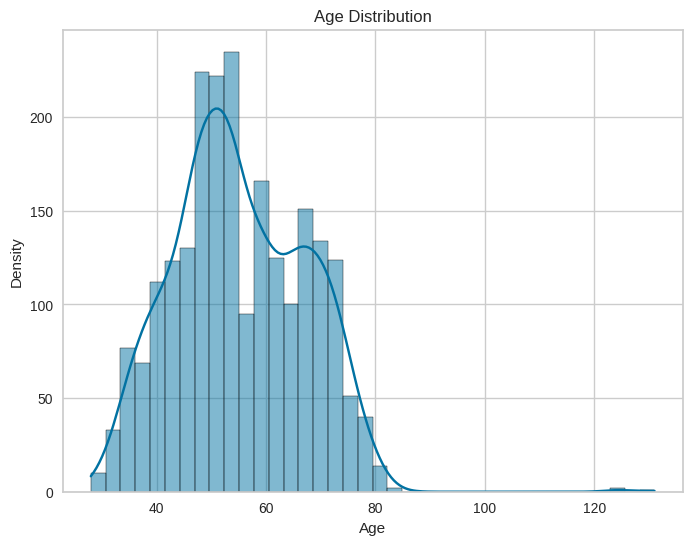

In [182]:
# Plotting the 'Age' column

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Age", kde=True, fill=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

In [183]:
df['Age'].agg(['min', 'max'])

min     28
max    131
Name: Age, dtype: int64

In [184]:
# Deriving living situation by marital status "Alone"

df["Living_With"] = df["Marital_Status"].replace(
    {
        "Married": "Partner",
        "Together": "Partner",
        "Absurd": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Divorced": "Alone",
        "Single": "Alone",
    }
)

In [185]:
# Feature indicating total children living in the household

df["Children"] = df["Kidhome"] + df["Teenhome"]

In [186]:
# Feature for total members in the householde

df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2}) + df["Children"]

In [187]:
# Feature pertaining parenthood

df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [188]:
# Segmenting education levels in three groups

df["Education"] = df["Education"].replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate",
    }
)

In [189]:
df["Spent"] = df["Wines"]+ df["Fruits"]+ df["Meat"]+ df["Fish"]+ df["Sweets"]+ df["Gold"]

In [190]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Children,Family_Size,Is_Parent,Spent
count,"2,240.00","2,240.00","2,240.00","2,240.00","2,240.00",2240,"2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00"
mean,"5,592.16","1,968.81","52,247.25",0.44,0.51,2013-07-10 10:01:42.857142784,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15,353.58,55.19,0.95,2.60,0.72,605.80
min,0.00,"1,893.00","1,730.00",0.00,0.00,2012-07-30 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,0.00,28.00,0.00,1.00,0.00,5.00
25%,"2,828.25","1,959.00","35,538.75",0.00,0.00,2013-01-16 00:00:00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,180.75,47.00,0.00,2.00,0.00,68.75
50%,"5,458.50","1,970.00","51,741.50",0.00,0.00,2013-07-08 12:00:00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,355.50,54.00,1.00,3.00,1.00,396.00
75%,"8,427.75","1,977.00","68,289.75",1.00,1.00,2013-12-30 06:00:00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,529.00,65.00,1.00,3.00,1.00,"1,045.50"
max,"11,191.00","1,996.00","666,666.00",2.00,2.00,2014-06-29 00:00:00,99.00,"1,493.00",199.00,"1,725.00",259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00,699.00,131.00,3.00,5.00,1.00,"2,525.00"
std,"3,246.66",11.98,"25,037.80",0.54,0.54,NaN,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36,202.12,11.98,0.75,0.91,0.45,602.25


In [191]:
df.describe(include=['O'])

,Education,Marital_Status,Living_With
count,2240,2240,2240
unique,3,8,2
top,Graduate,Married,Partner
freq,1127,864,1444


In [192]:
# Dropping some of the redundant features
columns_to_keep = [
    'Income',
    'Recency',
    'Wines',
    'Fruits',
    'Meat',
    'Fish',
    'Sweets',
    'Gold',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
              	'Complain',
                	'Customer_For',
                  	'Age',
                    	'Children',
                      	'Family_Size',
                        	'Is_Parent',
                            'Education',
                            	'Living_With',
                                'Spent'
]
df1 = df[columns_to_keep]

In [193]:
df1.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_For,Age,Children,Family_Size,Is_Parent,Spent
count,"2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00"
mean,"52,247.25",49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.01,353.58,55.19,0.95,2.60,0.72,605.80
std,"25,037.80",28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.10,202.12,11.98,0.75,0.91,0.45,602.25
min,"1,730.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.00,0.00,1.00,0.00,5.00
25%,"35,538.75",24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,180.75,47.00,0.00,2.00,0.00,68.75
50%,"51,741.50",49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,355.50,54.00,1.00,3.00,1.00,396.00
75%,"68,289.75",74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,529.00,65.00,1.00,3.00,1.00,"1,045.50"
max,"666,666.00",99.00,"1,493.00",199.00,"1,725.00",259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,699.00,131.00,3.00,5.00,1.00,"2,525.00"


In [194]:
df1.describe(include=['O'])

,Education,Living_With
count,2240,2240
unique,3,2
top,Graduate,Partner
freq,1127,1444


In [195]:
def his(col_name):
    plt.figure(figsize=(8, 6))
    plt.hist(df1[col_name], bins=20, color='skyblue', edgecolor='black')  # Adjust bins as needed
    plt.title(f'{col_name} Distribution')
    plt.xlabel(f'{col_name}')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


def box(col_name):
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df1[col_name], color='skyblue')
  plt.title(f'Box Plot of {col_name} Distribution')
  plt.xlabel(f'{col_name}')
  plt.grid(True)
  plt.show()

### **Income :** Customer's yearly household income

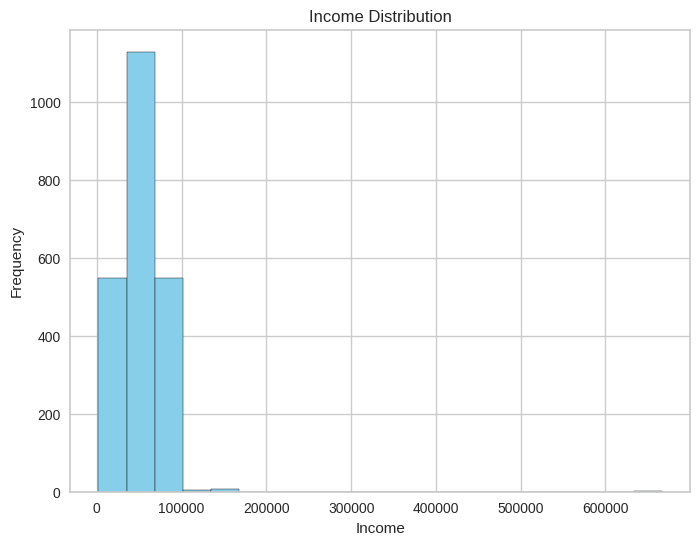

In [196]:
his('Income')

In [197]:
df['Income'].agg(['min', 'max'])

min     1,730.00
max   666,666.00
Name: Income, dtype: float64

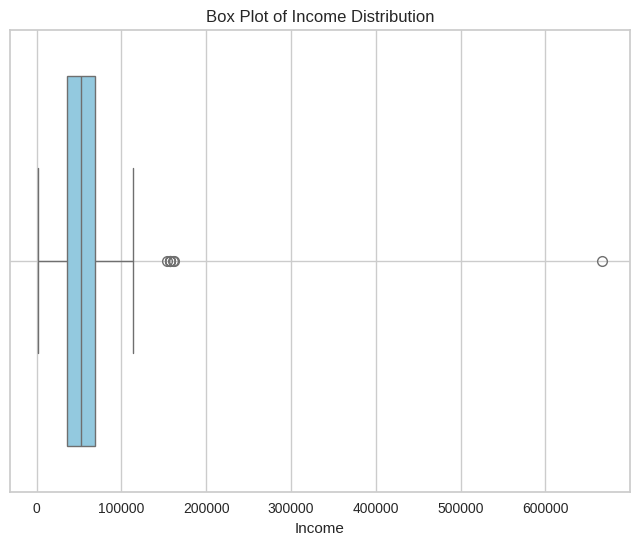

In [198]:
box('Income')

In [199]:
df1[['Income']].describe([0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,Income
count,"2,240.00"
mean,"52,247.25"
std,"25,037.80"
min,"1,730.00"
25%,"35,538.75"
50%,"51,741.50"
75%,"68,289.75"
85%,"75,534.90"
90%,"79,800.30"
95%,"83,927.00"


In [200]:
df1.loc[df1['Income'] > 100000, 'Income'] = 100000

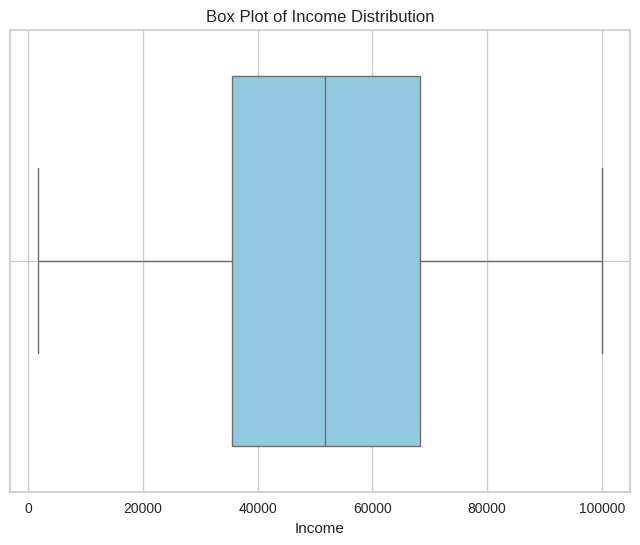

In [201]:
box('Income')

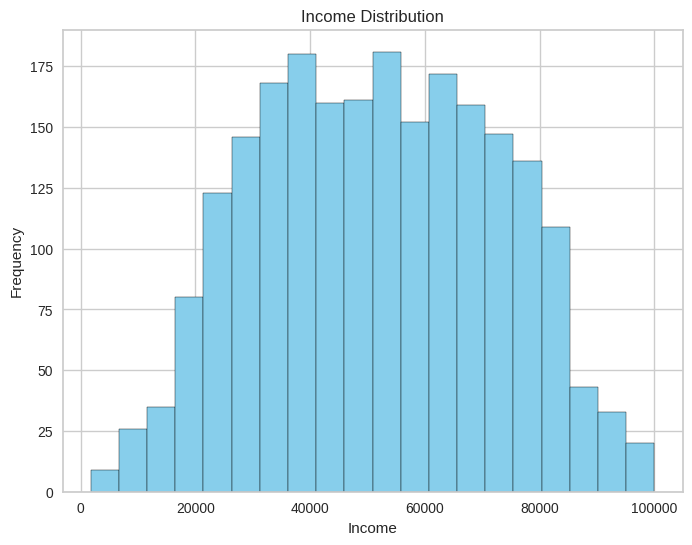

In [202]:
his('Income')

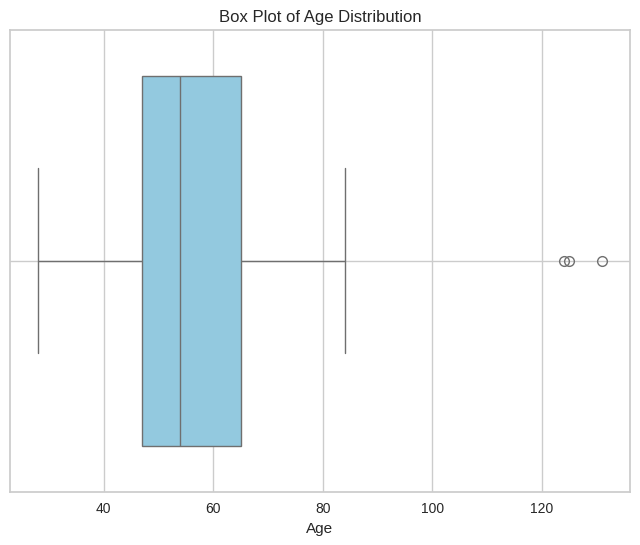

In [203]:
box('Age')

In [204]:
df1[['Age']].describe([0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,Age
count,"2,240.00"
mean,55.19
std,11.98
min,28.00
25%,47.00
50%,54.00
75%,65.00
85%,69.00
90%,72.00
95%,74.00


In [205]:
df1.loc[df1['Age'] > 80, 'Age'] = 80

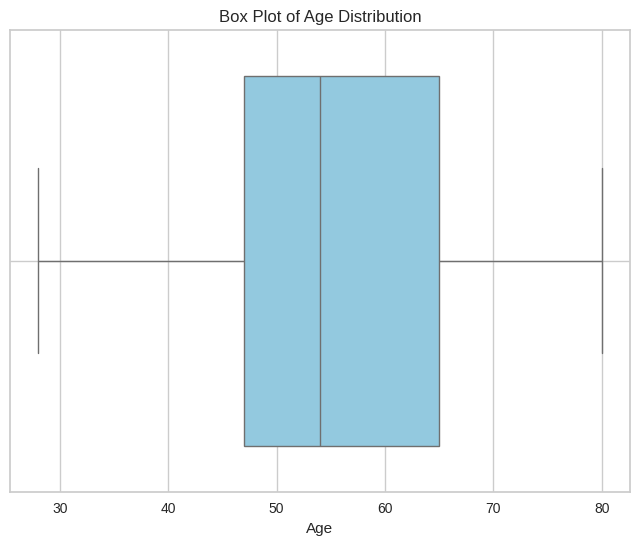

In [206]:
box('Age')

In [207]:
from sklearn.preprocessing import LabelEncoder

# Identify columns with object data type
object_cols = df1.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each object column
for col in object_cols:
    df1[col] = le.fit_transform(df1[col])

<ipython-input-207-e6a948918039>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])
<ipython-input-207-e6a948918039>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])


In [211]:
df1.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_For,Age,Children,Family_Size,Is_Parent,Education,Living_With,Spent
count,"2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00"
mean,"51,801.33",49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.01,353.58,55.13,0.95,2.60,0.72,0.61,0.64,605.80
std,"20,736.86",28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.10,202.12,11.72,0.75,0.91,0.45,0.68,0.48,602.25
min,"1,730.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.00,0.00,1.00,0.00,0.00,0.00,5.00
25%,"35,538.75",24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,180.75,47.00,0.00,2.00,0.00,0.00,0.00,68.75
50%,"51,741.50",49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,355.50,54.00,1.00,3.00,1.00,0.00,1.00,396.00
75%,"68,289.75",74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,529.00,65.00,1.00,3.00,1.00,1.00,1.00,"1,045.50"
max,"100,000.00",99.00,"1,493.00",199.00,"1,725.00",259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,699.00,80.00,3.00,5.00,1.00,2.00,1.00,"2,525.00"


In [212]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the dataset
scaler.fit(df1)

# Transform the dataset using the scaler and create a DataFrame
scaled_df = pd.DataFrame(scaler.transform(df1), columns=df1.columns)

In [213]:
scaled_df.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_For,Age,Children,Family_Size,Is_Parent,Education,Living_With,Spent
count,"2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00"
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.42,-1.70,-0.90,-0.66,-0.74,-0.69,-0.66,-0.84,-1.20,-1.47,-0.91,-1.78,-2.19,-0.10,-1.75,-2.32,-1.26,-1.76,-1.58,-0.89,-1.35,-1.00
25%,-0.78,-0.87,-0.83,-0.64,-0.67,-0.63,-0.63,-0.67,-0.69,-0.75,-0.91,-0.86,-0.95,-0.10,-0.86,-0.69,-1.26,-0.66,-1.58,-0.89,-1.35,-0.89
50%,-0.00,-0.00,-0.39,-0.46,-0.44,-0.47,-0.46,-0.38,-0.17,-0.03,-0.23,-0.24,0.28,-0.10,0.01,-0.10,0.07,0.45,0.63,-0.89,0.74,-0.35
75%,0.80,0.86,0.60,0.17,0.29,0.23,0.14,0.23,0.35,0.69,0.46,0.68,0.69,-0.10,0.87,0.84,0.07,0.45,0.63,0.57,0.74,0.73
max,2.32,1.72,3.53,4.34,6.90,4.06,5.72,6.10,6.56,8.25,8.67,2.22,6.05,10.28,1.71,2.12,2.73,2.65,0.63,2.03,0.74,3.19


In [214]:
# Numbers formatting
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [215]:
scaled_df.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_For,Age,Children,Family_Size,Is_Parent,Education,Living_With,Spent
count,"2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00"
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.42,-1.70,-0.90,-0.66,-0.74,-0.69,-0.66,-0.84,-1.20,-1.47,-0.91,-1.78,-2.19,-0.10,-1.75,-2.32,-1.26,-1.76,-1.58,-0.89,-1.35,-1.00
25%,-0.78,-0.87,-0.83,-0.64,-0.67,-0.63,-0.63,-0.67,-0.69,-0.75,-0.91,-0.86,-0.95,-0.10,-0.86,-0.69,-1.26,-0.66,-1.58,-0.89,-1.35,-0.89
50%,-0.00,-0.00,-0.39,-0.46,-0.44,-0.47,-0.46,-0.38,-0.17,-0.03,-0.23,-0.24,0.28,-0.10,0.01,-0.10,0.07,0.45,0.63,-0.89,0.74,-0.35
75%,0.80,0.86,0.60,0.17,0.29,0.23,0.14,0.23,0.35,0.69,0.46,0.68,0.69,-0.10,0.87,0.84,0.07,0.45,0.63,0.57,0.74,0.73
max,2.32,1.72,3.53,4.34,6.90,4.06,5.72,6.10,6.56,8.25,8.67,2.22,6.05,10.28,1.71,2.12,2.73,2.65,0.63,2.03,0.74,3.19


## Dimensionality Reduction with PCA

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [216]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA on scaled data
pca.fit(scaled_df)

# Transform scaled data using PCA and create a DataFrame
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=["col1", "col2", "col3"])

# Summary statistics of the transformed data
summary = PCA_df.describe().T

# Print summary statistics
print(summary)

        count  mean  std   min   25%   50%  75%  max
col1 2,240.00  0.00 2.78 -5.78 -2.45 -0.89 2.30 7.48
col2 2,240.00 -0.00 1.55 -4.15 -1.06 -0.17 1.03 6.03
col3 2,240.00 -0.00 1.21 -3.75 -0.86 -0.06 0.83 6.40


<ipython-input-217-6c2bb8e68585>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap='viridis', marker="o")


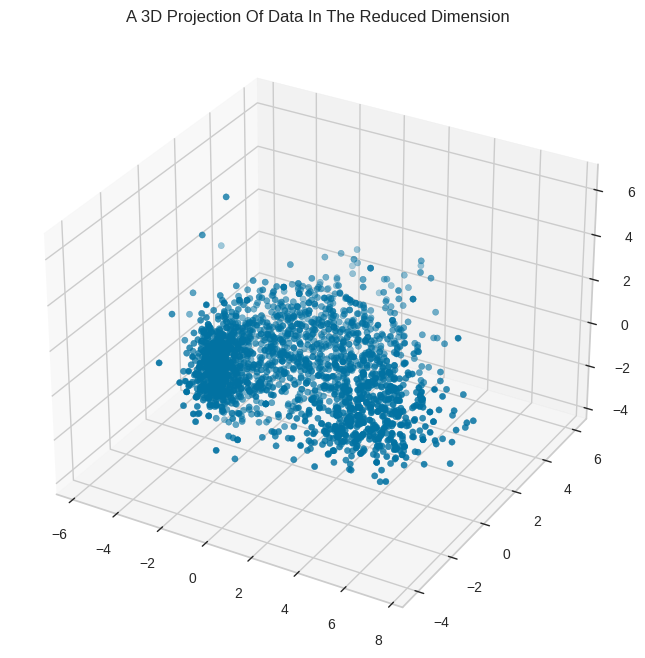

In [217]:
# 3D Projection of data in the reduced dimension
x = PCA_df["col1"]
y = PCA_df["col2"]
z = PCA_df["col3"]

# Plot the 3D projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, cmap='viridis', marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

Reduced the attributes to three dimensions and now I'll proceed with clustering using Agglomerative clustering. This method is hierarchical, meaning it merges examples until reaching the desired number of clusters.

The clustering process involves:

* Using the Elbow Method to determine the optimal number of clusters.
* Performing Agglomerative Clustering.
* Examining the formed clusters through a scatter plot.

Elbow Method to determine the number of clusters to be formed:


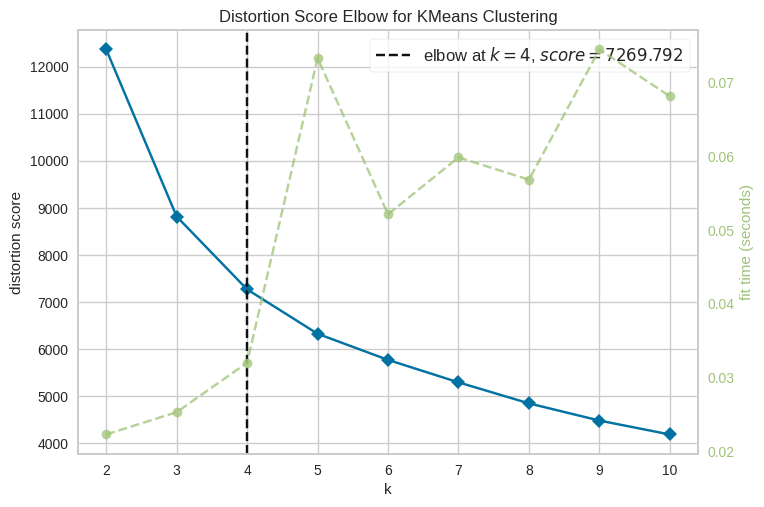

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [218]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of the Elbow Method to determine the number of clusters to form.
print('Elbow Method to determine the number of clusters to be formed:')
elbow_visualizer = KElbowVisualizer(KMeans(n_init=10), k=10)
elbow_visualizer.fit(PCA_df)
elbow_visualizer.show()